In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

node = "LoA_C1312"  # Adjust as needed
filestem = "data_files/LoA_C1312"

print("**********************************")
print("Beginning quick node plotter for:", node + "/" + filestem) 
print("**********************************")

# Read your unblanked bliss results file
unblanked_bliss_results = pd.read_csv(
    filestem + ".dat",
    skiprows=9,
    delim_whitespace=True,  # using whitespace since your file preview has space separation
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

**********************************
Beginning quick node plotter for: LoA_C1312/data_files/LoA_C1312
**********************************


/var/folders/z0/kkt653vs1rscq9_7hh77yyyr0000gn/T/ipykernel_42098/2162371398.py:15: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



Number of hits:  130918


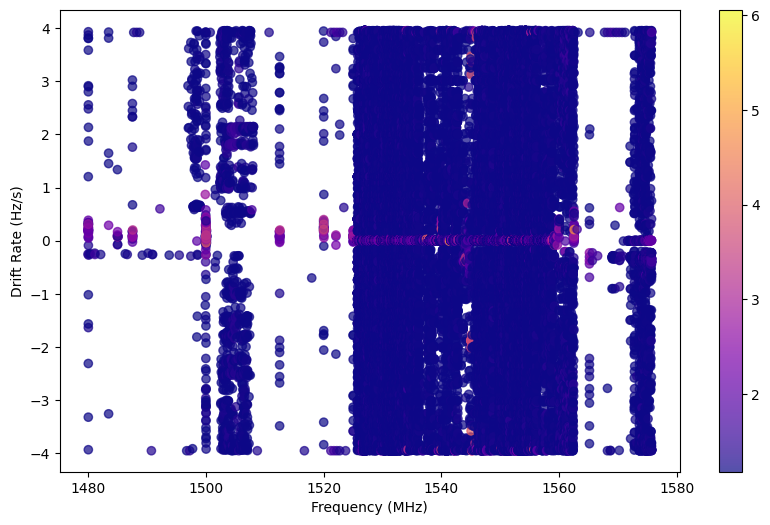

In [63]:
print("Number of hits: ", len(unblanked_bliss_results))

fig, ax = plt.subplots(figsize=(10,6))

cmap = mpl.cm.cool

scatter = ax.scatter(unblanked_bliss_results['Uncorrected_Frequency'],
                     unblanked_bliss_results['Drift_Rate'], 
                     c=np.log10(unblanked_bliss_results['SNR']), 
                     alpha=0.7,
                     cmap='plasma')

plt.xlabel("Frequency (MHz)")
plt.ylabel("Drift Rate (Hz/s)")

fig.colorbar(scatter)

In [64]:
print("Number of hits: ", len(unblanked_bliss_results))

# Add log10 SNR for color scale
unblanked_bliss_results['logSNR'] = np.log10(unblanked_bliss_results['SNR'])

# Make interactive scatter plot
fig = px.scatter(
    unblanked_bliss_results,
    x="Uncorrected_Frequency",
    y="Drift_Rate",
    color="logSNR",
    color_continuous_scale="plasma",         
    hover_name="Top_Hit_#",        
    labels={"Uncorrected_Frequency": "Frequency (MHz)",
            "Drift_Rate": "Drift Rate (Hz/s)",
            "logSNR": "log10(SNR)"},
    title=f"Node: {node}"
)

# Tweak marker size
fig.update_traces(marker=dict(size=2))

fig.show()


Number of hits:  130918


(array([4.700e+01, 2.000e+00, 1.000e+00, 6.000e+00, 0.000e+00, 1.000e+01,
        2.000e+00, 2.100e+01, 2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 6.000e+00,
        5.200e+01, 8.600e+01, 1.140e+02, 1.100e+01, 5.000e+00, 9.400e+01,
        2.670e+02, 1.970e+02, 1.010e+02, 2.000e+02, 1.190e+02, 2.500e+01,
        1.000e+00, 0.000e+00, 1.000e+00, 1.200e+01, 3.000e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.600e+01,
        0.000e+00, 1.000e+01, 6.000e+00, 3.000e+00, 0.000e+00, 6.730e+02,
        3.474e+03, 8.610e+03, 4.288e+03, 4.217e+03, 5.313e+03, 5.744e+03,
        8.510e+03, 4.845e+03, 5.067e+03, 2.712e+03, 2.606e+03, 4.850e+02,
        2.312e+03, 6.050e+02, 8.110e+02, 1.391e+03, 1.082e+03, 2.842e+03,
        6.050e+02, 2.250e+02, 7.440e+02, 4.164e+03, 3.816e+03, 3.392e+03,
        1.845e+03, 5.841e+03, 2.731e+03, 4.186e+03, 7.260e+03, 8.988e+03,
        3.592e+03, 3.931e+03, 2.426e+0

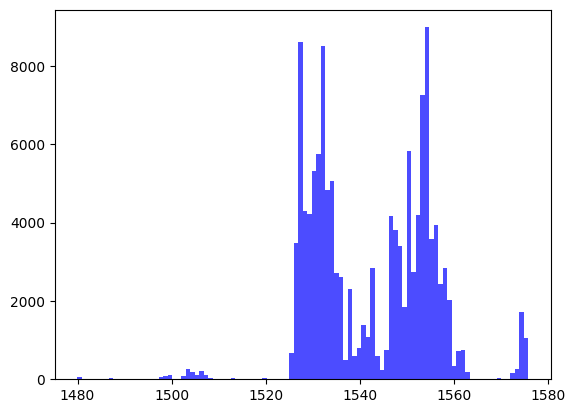

In [65]:
plt.hist(unblanked_bliss_results['Uncorrected_Frequency'], bins=100, color='blue', alpha=0.7)


In [70]:
# define frequency ranges to blank, in MHz

blanking_ranges = [[1525, 1562],[1572,1580]
                   ]

# remove hits in blanked ranges
for range in blanking_ranges:
    unblanked_bliss_results = unblanked_bliss_results[~unblanked_bliss_results["Uncorrected_Frequency"].between(range[0], range[1])]

Number of hits:  1478


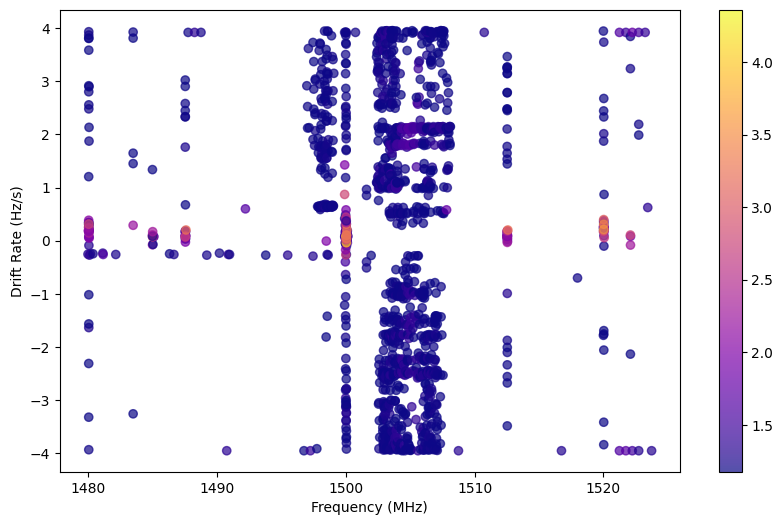

In [71]:
fig, ax = plt.subplots(figsize=(10,6))

cmap = mpl.cm.cool

scatter = ax.scatter(unblanked_bliss_results['Uncorrected_Frequency'],
                     unblanked_bliss_results['Drift_Rate'], 
                     c=np.log10(unblanked_bliss_results['SNR']), 
                     alpha=0.7,
                     cmap='plasma')

plt.xlabel("Frequency (MHz)")
plt.ylabel("Drift Rate (Hz/s)")

fig.colorbar(scatter)
print("Number of hits: ", len(unblanked_bliss_results))

(array([ 47.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   6.,   0.,   0.,
         10.,   0.,   0.,   1.,   1.,   0.,  22.,   1.,   0.,   1.,   1.,
          0.,   1.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   4.,   6.,  16.,  43.,  56.,  19.,
          0., 118.,   6.,   1.,   0.,   4.,   1.,  55., 114., 108., 133.,
         81.,  72.,  47.,  44.,  92., 102.,  75.,  43.,  30.,   7.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,  42.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,  36.,   0.,   0.,   2.,   2.,   8.,   4.,   1.,
          2.]),
 array([1479.971597  , 1480.40937512, 1480.84715324, 1481.28493136,
        1481.72270948, 1482.1604876 , 1482.59826572, 1483.03604384,
        1483.47382196, 1483.91160008, 1484.3493782 , 1484.78715632,
        1485.22493444, 1485.66271256, 1486.10049068, 1486.5382688 ,
        1486.97604692, 1487.41382504, 1487.851

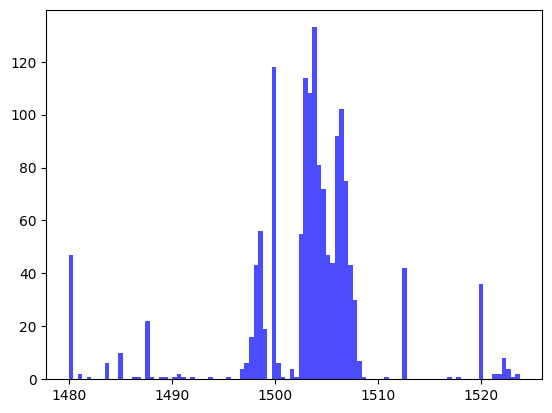

In [72]:
plt.hist(unblanked_bliss_results['Uncorrected_Frequency'], bins=100, color='blue', alpha=0.7)


In [73]:
print("Number of hits: ", len(unblanked_bliss_results))

# Add log10 SNR for color scale
unblanked_bliss_results['logSNR'] = np.log10(unblanked_bliss_results['SNR'])

# Make interactive scatter plot
fig = px.scatter(
    unblanked_bliss_results,
    x="Uncorrected_Frequency",
    y="Drift_Rate",
    color="logSNR",
    color_continuous_scale="plasma",       
    hover_name="Top_Hit_#",        
    labels={"Uncorrected_Frequency": "Frequency (MHz)",
            "Drift_Rate": "Drift Rate (Hz/s)",
            "logSNR": "log10(SNR)"},
    title=f"Node: {node}"
)

# Tweak marker size
fig.update_traces(marker=dict(size=2))

fig.show()

Number of hits:  1478
